Sistemas Inteligntes - IF684EC
# Miniprojeto Decision Tree
O projeto tem como objetivo introduzir a implementação de Árvored de Decisão (DTs) e verificar o impacto de alguns parâmetros nas métricas finais.

### Equipe:

> Jeferson Severino de Araújo (jsa2)

> Lucas Nascimento Brandão (lnb)

> Matheus Julío Boncsidai de Oliveira (mjbo)

> Pedro Henrique Almeida Girão Peixinho (phagp)

> Victor Gabriel de Carvalho (vgc3)

## Dataset
<p align="justify">
  O naufrágio do Titanic é um dos naufrágios mais infames da história.
<p align="justify">
  Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.
<p align="justify">
  Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.
<p align="justify">
  O dataset é composto por três arquivos que incluem informações do passageiro, como nome, idade, sexo, classe socioeconômica etc. Um conjunto de dados é intitulado train.csv, o outro é intitulado test.csv e o ultimo é gender_submission.csv, que contem as labels para o dataset de teste. Segue abaixo os atributos do dataset:

> survival: representa se o passageiro sobrevivieu (0 = No, 1 = Yes)

> pclass:	representa a classe do ticket	(1 = 1st, 2 = 2nd, 3 = 3rd)

> sex:	sexo do passageiro

> age: idade em anos

> sibsp: número de irmãos/cônjuges a bordo do Titanic

> parch: número de pais/filhos a bordo do Titanic

> ticket: número do bilhete

> fare: tarifa do passageiro

> cabin: número da cabine

> embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

<p align="justify">
  train.csv conterá os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, mais importante, revelará se eles sobreviveram ou não.
<p align="justify">
  O conjunto de dados test.csv contém informações semelhantes, onde vamos prever os resultados.

  Link: https://www.kaggle.com/c/titanic

## Implementação

### Imports
<p align="justify">
Será necessário o uso da biblioteca Pandas para uma melhor manipulação e tratamento dos dados, matplotlib para melhor visualização e numpy para alguma operações matemáticas.

Ademais, utilizaremos os seguintes módulos SKLearn:

> DecisionTreeClassifier, que será nosso modelo de Árvore de Decisão

> train_test_split, para devidir eficientemente o dataset

> GridSearchCV, para achar um possível melhor modelo

> classification_report / confusion_matrix, para imprimir as métricas detalhadas

<p align="justify">
Utilizaremos o SMOTE do IMBLearn para gerar novos casos e balancear as classes. Por estamos implementando pelo Collab, necessitamos do drive do google.colab para acessar nosso dataset na núvem.

<p align="justify">
Como extra, compararemos o desempenho da Decision Tree com a Random Forest. Utilizaremos a RandomForestClassifier do SKLearn. Também usanos o shap para ver o peso dos atributos na decisão final.

A utilização de cada uma será explicitada posteriormente.

In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import shap

from google.colab import drive
drive.mount('/content/gdrive')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




---



### Data Exploration

Primeiramente, iremos percorrer os datasets, verificando relações e observando se ha algum tipo de problema que devemos corrigir.

<p align="justify">
Como já dito, o dataset é composto por três arquivos que incluem informações dos passageiros.

In [3]:
dataset_train = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/train.csv")
dataset_test = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/test.csv")
dataset_test_labels = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/gender_submission.csv")

dataset_train. shape, dataset_test.shape, dataset_test_labels.shape

((891, 12), (418, 11), (418, 2))

<p align="justify">
Aqui utilizaremos o método 'head' para mostras as primeiras 5 linhas (amostras) dos datasets. Essa visualização ajuda a vermos o estado inicial dos dados.

In [4]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dataset_test_labels.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p align="justify">
Usaremos alguns gráficos para melhor visualizar o dataset e suas relações. O primeiro mostra a quantidade de exemplares para cada um dos atributos categóricos presentes.

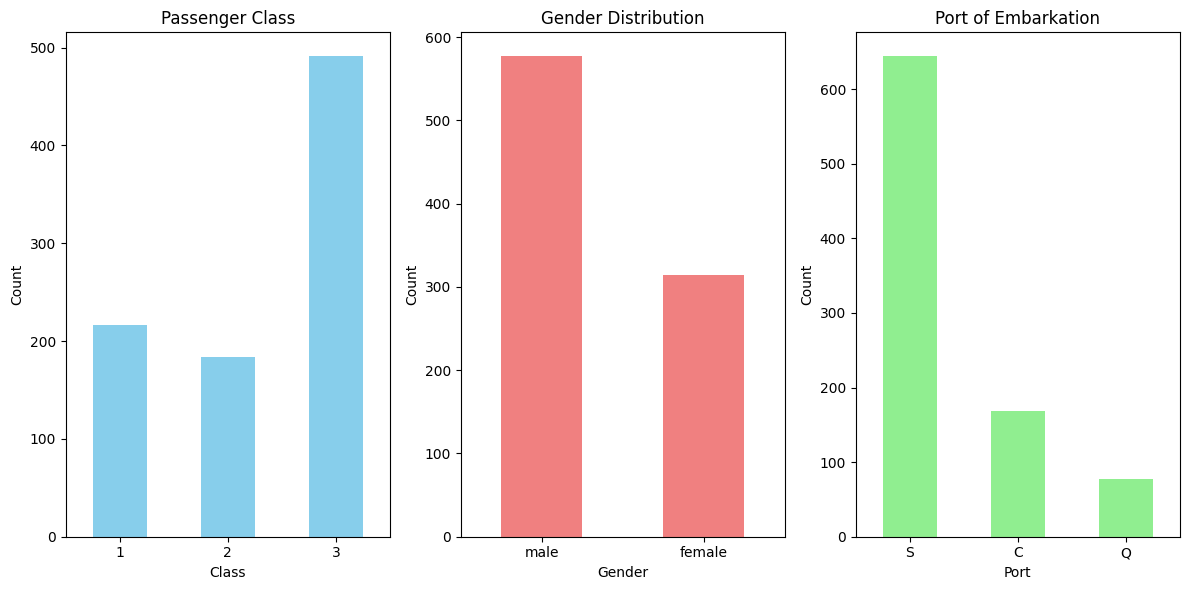

In [7]:
# Bar plots to visualize categorical features
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
dataset_train['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
dataset_train['Sex'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
dataset_train['Embarked'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<p align="justify">
A seguir mostraremos a relação 2 a 2 entre alguns atributos numéricos.

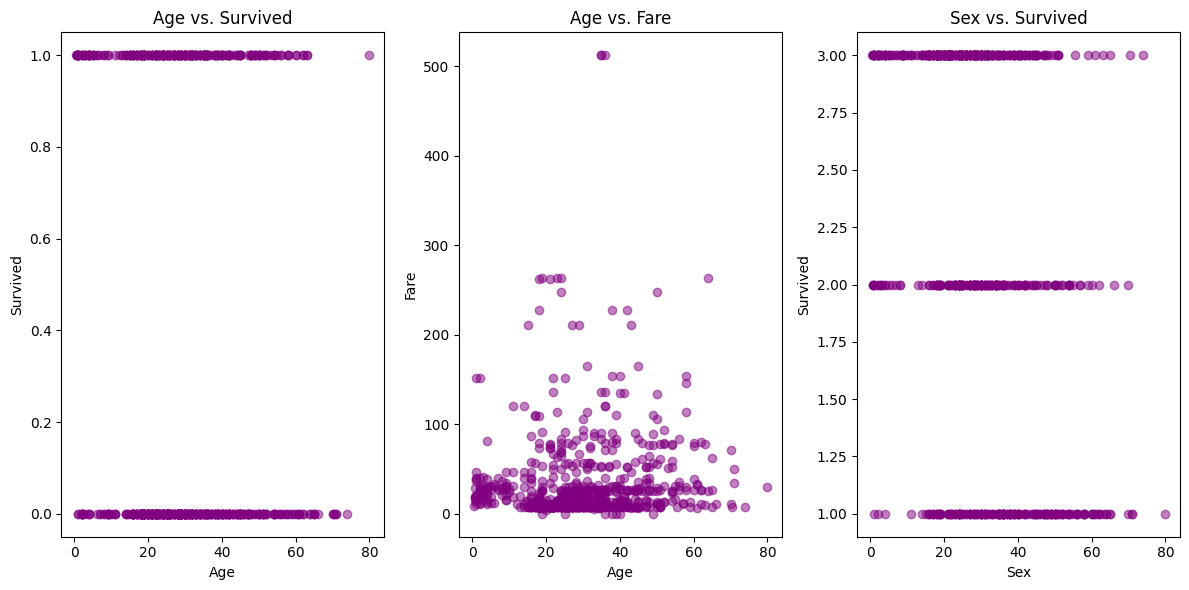

In [8]:
# Scatter plot of age vs. survived
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(dataset_train['Age'], dataset_train['Survived'], c='purple', alpha=0.5)
plt.title('Age vs. Survived')
plt.xlabel('Age')
plt.ylabel('Survived')

plt.subplot(1, 3, 2)
plt.scatter(dataset_train['Age'], dataset_train['Fare'], c='purple', alpha=0.5)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.subplot(1, 3, 3)
plt.scatter(dataset_train['Age'], dataset_train['Pclass'], c='purple', alpha=0.5)
plt.title('Sex vs. Survived')
plt.xlabel('Sex')
plt.ylabel('Survived')

plt.tight_layout()
plt.show()

<p align="justify">
Finalmente, aqui estão gráficos a respeito da chance de sobrevivencia. Aqui já pode ser observado como o sexo do passageiro parece ter um grande impacto na sobrevivência.

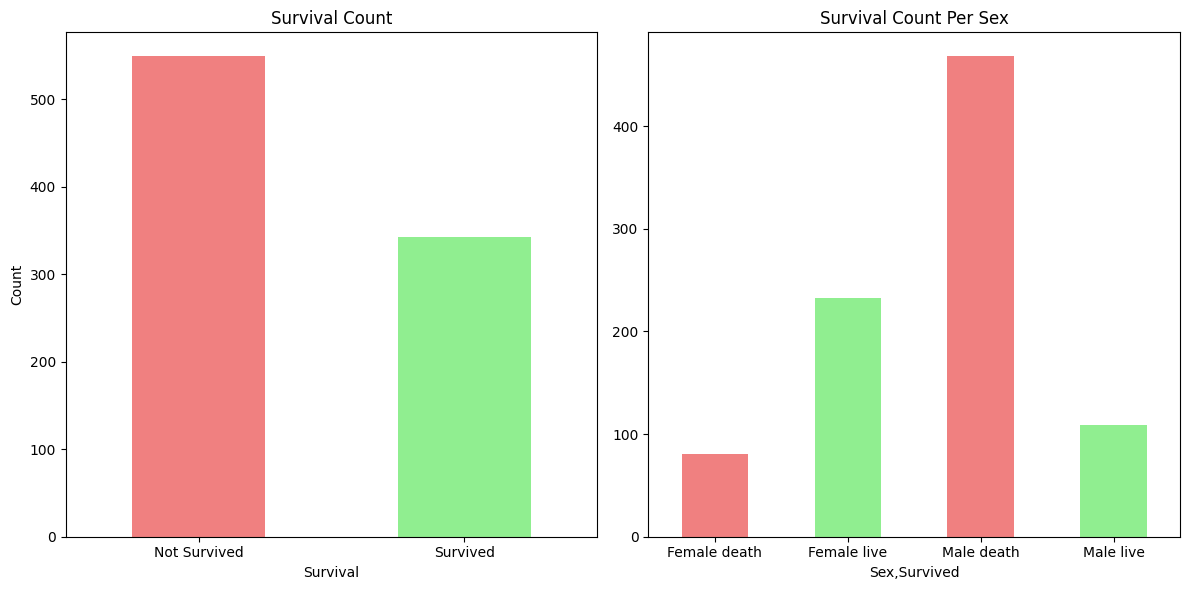

In [9]:
# Bar plot for survival rates
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dataset_train['Survived'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Survival Count')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)

plt.subplot(1, 2, 2)
dataset_train.groupby(['Sex', 'Survived']).size().plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Survival Count Per Sex')
plt.xticks([0, 1, 2, 3], ['Female death', 'Female live', 'Male death', 'Male live'], rotation=0)

plt.tight_layout()
plt.show()



---



### Data Cleaning
<p align="justify">
Agora que analisamos o dataset, precisamos fazer uma limpeza nos dados, eliminando valores irrelevantes ou que possam prejudicar o modelo. No nosso caso, iremos remover as informações de ticket, nome, ID, e fare, que se tratam de valores sem importância estatística, que não ajudam em nosso problerma de decisão. De forma semelhante, removeremos o atributo "Cabin", pois menos de 25% das amostras contam com esse dado.

In [10]:
dataset_train = dataset_train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)
dataset_test = dataset_test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)
dataset_test_labels = dataset_test_labels.drop("PassengerId", axis=1)

dataset_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
698,0,1,male,49.0,1,1,C
269,1,1,female,35.0,0,0,S
192,1,3,female,19.0,1,0,S
95,0,3,male,NaN,0,0,S
86,0,3,male,16.0,1,3,S


Aqui, sample seleciona registros aleatórios do dataset para serem exibidos.

In [11]:
dataset_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
342,3,male,NaN,1,9,S
67,1,male,47.0,0,0,S
166,1,male,48.0,0,0,C
243,3,male,NaN,0,0,S
162,2,female,26.0,0,0,S


In [12]:
dataset_test_labels.sample(5)

,Survived
53,1
14,1
32,1
246,1
190,0


É interessante vermos se todos os tipos de dados presentes estão corretos e condizem com a grandeza do atributo.

In [13]:
dataset_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

<p align="justify">
O trecho de código a seguir remove do dataset as linhas que possuem valores faltantes (NaN), que não ajudariam na classificação. Achamos essa abordagem pertinente devido ao baixo número de atributos NaN, o que não causaria uma remoção massiva de registros.

In [14]:
dataset_train = dataset_train.dropna(axis=0)
dataset_train.shape

(712, 7)

<p align="justify">
Como o dataset de teste tem as classes em um arquivo separado, primeiro vamos junta-los para facilitar a remoção simultânea (no dataset X e no y) de linhas sem valores.

In [15]:
dataset_test_full = pd.concat([dataset_test, dataset_test_labels], axis=1)
dataset_test_full = dataset_test_full.dropna()

dataset_test_full.sample(100)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
206,3,female,35.0,0,0,Q,1
299,3,male,29.0,0,0,S,0
192,3,male,11.5,1,1,S,0
156,1,female,29.0,0,0,S,1
177,1,male,54.0,1,0,C,0
...,...,...,...,...,...,...,...
20,1,male,55.0,1,0,C,0
149,2,male,30.0,1,1,S,0
303,3,male,24.0,0,0,S,0
4,3,female,22.0,1,1,S,1


In [16]:
dataset_test_labels = dataset_test_full['Survived']
dataset_test = dataset_test_full.drop(['Survived'], axis=1)

dataset_test.shape, dataset_test_labels.shape

((332, 6), (332,))

<p align="justify">
Agora, transformaremos o atributo multi-class "Embarked" em um vetor one-hot-encoded, para auxiliar na classificação e no balanceamento por SMOTE, que veremos mais adiante.

In [17]:
dataset_train = pd.get_dummies(data=dataset_train, columns=["Embarked"])
dataset_test = pd.get_dummies(data=dataset_test, columns=["Embarked"])

dataset_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
675,0,3,male,18.0,0,0,0,0,1
769,0,3,male,32.0,0,0,0,0,1
532,0,3,male,17.0,1,1,1,0,0
594,0,2,male,37.0,1,0,0,0,1
482,0,3,male,50.0,0,0,0,0,1


In [18]:
dataset_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
247,1,2,female,24.0,0,2,0,0,1
492,0,1,male,55.0,0,0,0,0,1
4,0,3,male,35.0,0,0,0,0,1
115,0,3,male,21.0,0,0,0,0,1
719,0,3,male,33.0,0,0,0,0,1


<p align="justify">
Finalmente, converteremos os valores "male" e "female" do dataset para os valores numéricos 0 e 1, respectivamente.

In [19]:
dataset_train["Sex"].replace({'male': 0, 'female':1}, inplace=True)
dataset_test["Sex"].replace({'male': 0, 'female':1}, inplace=True)

dataset_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
494,0,3,0,21.0,0,0,0,0,1
289,1,3,1,22.0,0,0,0,1,0
518,1,2,1,36.0,1,0,0,0,1
80,0,3,0,22.0,0,0,0,0,1
615,1,2,1,24.0,1,2,0,0,1


In [20]:
dataset_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
162,2,1,26.0,0,0,0,0,1
381,3,0,26.0,0,0,0,1,0
385,2,1,24.0,1,2,0,0,1
360,3,0,14.5,8,2,0,0,1
149,2,0,30.0,1,1,0,0,1




---



### Data Split
<p align="justify">
Separando o dataset de treinamento em X e y e renomeando-os.

In [21]:
y_train = dataset_train["Survived"]
X_train = dataset_train.drop(columns=['Survived'])

y_test = dataset_test_labels
X_test = dataset_test

In [22]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [23]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64



---



### Data Balancing

<p align="justify">
Deixaremos o dataset mais balanceado gerando amostras sintéticas até as duas classes alvo terem número igual amostras. O SMOTE usa o algorítmo dos "K vizinhos mais próximos" para gerar novas amostras.

In [24]:
smote = SMOTE(sampling_strategy='minority', random_state=9)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.shape, y_train.shape

((848, 8), (848,))

In [25]:
X_test, y_test = smote.fit_resample(X_test, y_test)

X_test.shape, y_test.shape

((410, 8), (410,))



---



### Modelos
<p align="justify">
Agora, vamos testar a árvore de decisão em diversos modelos, com diferentes níveis máximos, critérios e pesos, e comparar os resultados obtidos. Utilizaremos o random_state com um valor arbitrário, para manter a constância entre os testes.

In [26]:
# Modelo de árvore de decisão com 2 níveis
decision_tree_0 = DecisionTreeClassifier(max_depth=2, random_state=9)
decision_tree_0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=9)

Depois, vamos fazer a predição com o nosso modelo utilizando o dataset de testes

In [27]:
y_pred = decision_tree_0.predict(X_test)

In [28]:
y_pred.shape

(410,)

Em seguida, foram visualizados os valores das métricas para precision, recall e f1-score

In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       155
           1       1.00      0.80      0.89       255

    accuracy                           0.88       410
   macro avg       0.88      0.90      0.88       410
weighted avg       0.91      0.88      0.88       410



Após isso, foi printado a matriz de confusão com as previsões feitas pelo modelo

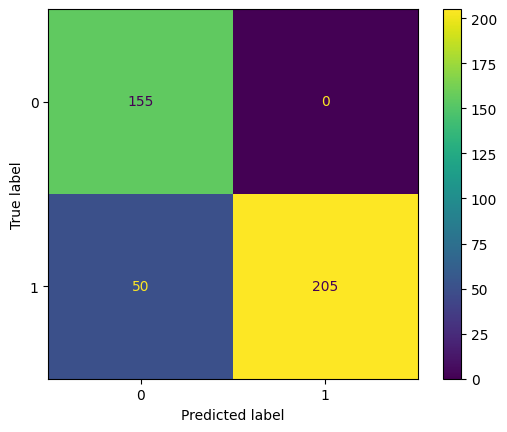

In [30]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



Para o próximo modelo, o parâmetro alterado foi novamente o nível máximo, que foi aumentado para 3, ocasionando algumas mudanças nos resultados.

In [31]:
decision_tree_1 = DecisionTreeClassifier(max_depth=3, random_state=9)
decision_tree_1.fit(X_train, y_train)
y_pred = decision_tree_1.predict(X_test)

In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       154
           1       0.98      0.79      0.87       256

    accuracy                           0.86       410
   macro avg       0.86      0.88      0.85       410
weighted avg       0.89      0.86      0.86       410



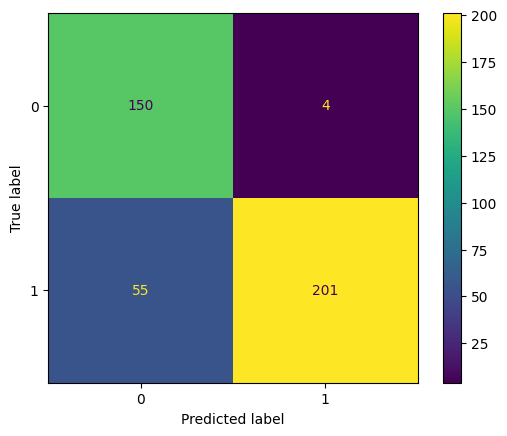

In [33]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



Para o próximo modelo, o parâmetro alterado foi novamente o nível máximo, que foi aumentado para 4, ocasionando algumas mudanças nos resultados.

In [34]:
decision_tree_2 = DecisionTreeClassifier(max_depth=4, random_state=9)
decision_tree_2.fit(X_train, y_train)
y_pred = decision_tree_2.predict(X_test)

In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       181
           1       0.87      0.78      0.82       229

    accuracy                           0.81       410
   macro avg       0.81      0.81      0.81       410
weighted avg       0.82      0.81      0.81       410



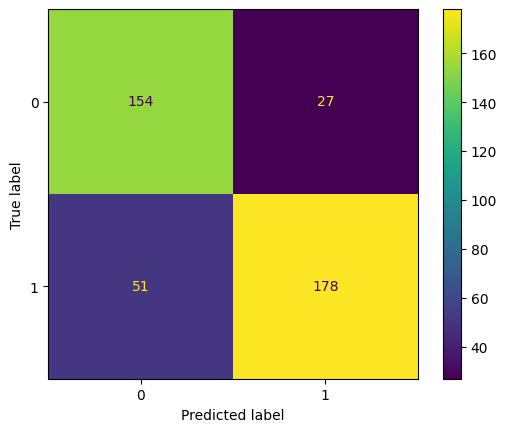

In [36]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



Para o próximo modelo, o parâmetro alterado foi novamente o nível máximo, que foi aumentado para 5, ocasionando algumas mudanças nos resultados.

In [37]:
decision_tree_3 = DecisionTreeClassifier(max_depth=5, random_state=9)
decision_tree_3.fit(X_train, y_train)
y_pred = decision_tree_3.predict(X_test)

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       188
           1       0.81      0.75      0.78       222

    accuracy                           0.77       410
   macro avg       0.77      0.77      0.77       410
weighted avg       0.77      0.77      0.77       410



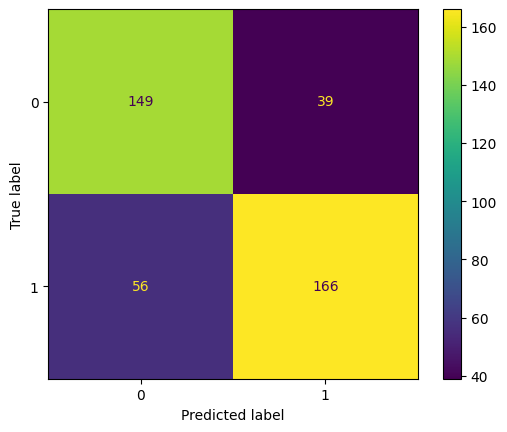

In [39]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



O próximo modelo teve dois parâmetros alterados. Foi configurado um nível máximo de decisão de 3 e o uso do critério entropy de decisão ao invés do padrão gini.

In [40]:
decision_tree_4 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=9)
decision_tree_4.fit(X_train, y_train)
y_pred = decision_tree_4.predict(X_test)

In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       154
           1       0.98      0.79      0.87       256

    accuracy                           0.86       410
   macro avg       0.86      0.88      0.85       410
weighted avg       0.89      0.86      0.86       410



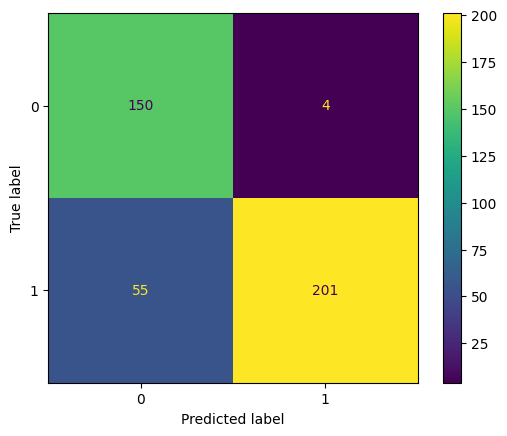

In [42]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



O próximo modelo teve dois parâmetros alterados. Foi configurado um nível máximo de decisão de 3 e o uso do critério log loss de decisão ao invés do padrão gini.

In [43]:
decision_tree_5 = DecisionTreeClassifier(max_depth=3, criterion='log_loss', random_state=9)
decision_tree_5.fit(X_train, y_train)
y_pred = decision_tree_5.predict(X_test)

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       154
           1       0.98      0.79      0.87       256

    accuracy                           0.86       410
   macro avg       0.86      0.88      0.85       410
weighted avg       0.89      0.86      0.86       410



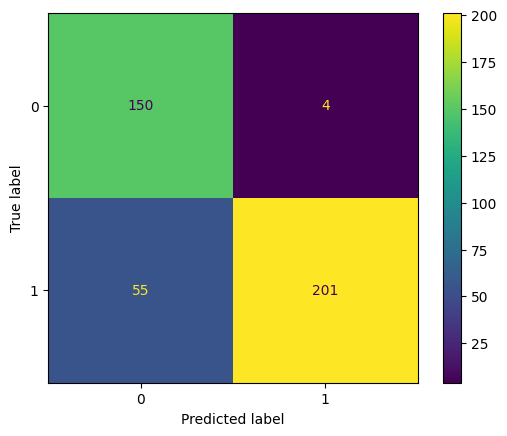

In [45]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()



---



O próximo modelo teve dois parâmetros alterados. Foi configurado um nível máximo de decisão de 3 e o uso do splitter random de decisão ao invés do padrão better.

In [46]:
decision_tree_6 = DecisionTreeClassifier(max_depth=3, splitter='random', random_state=9)
decision_tree_6.fit(X_train, y_train)
y_pred = decision_tree_6.predict(X_test)

In [47]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       180
           1       0.88      0.78      0.83       230

    accuracy                           0.82       410
   macro avg       0.82      0.82      0.82       410
weighted avg       0.82      0.82      0.82       410



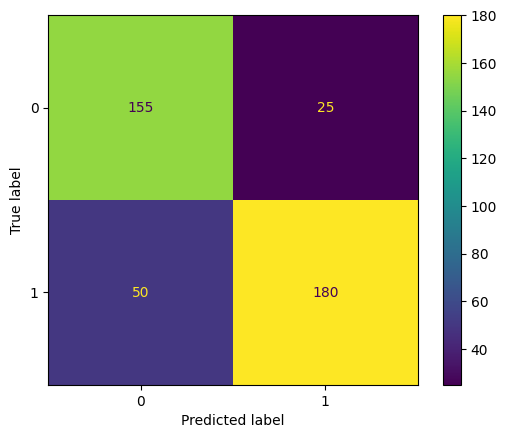

In [48]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()

### Importancia das Variáveis

<p align="justify">
Utilizando bibliotecas como Shap ou a própria função de DecisionTree, podemos ver a importância que cada atributo teve na decisão final.

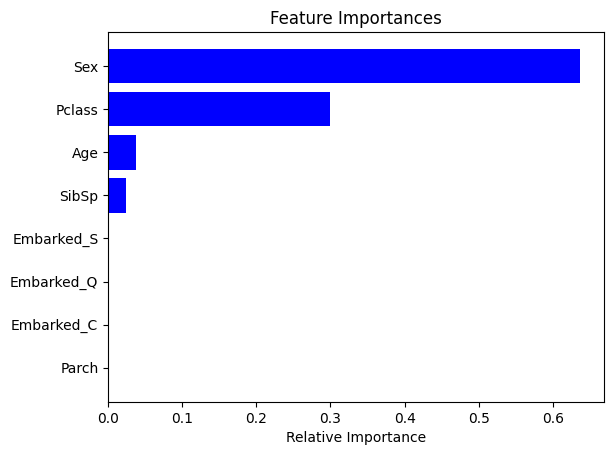

In [49]:
features = X_train.columns
importances = decision_tree_6.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({'features': features,
                                       'importances': importances})

plt.title('Feature Importances')
plt.barh(range(len(importances[indices][-15:])), importances[indices][-15:], color='b', align='center')
plt.yticks(range(len(importances[indices][-15:])), [features[i] for i in indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

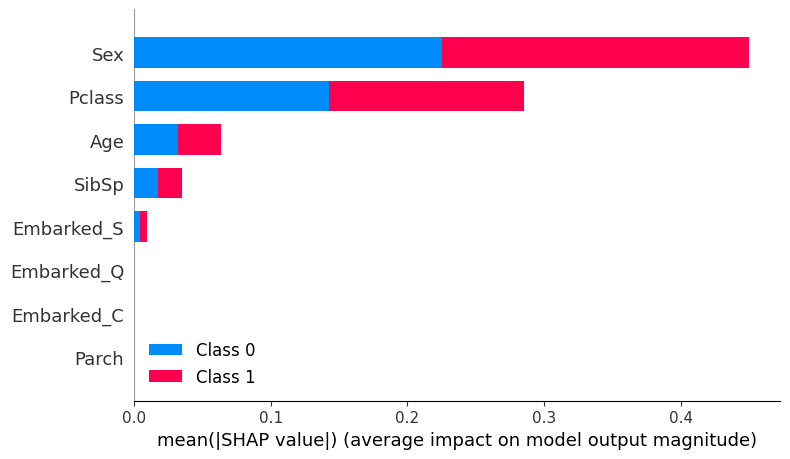

In [50]:
explainer = shap.TreeExplainer(decision_tree_6)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

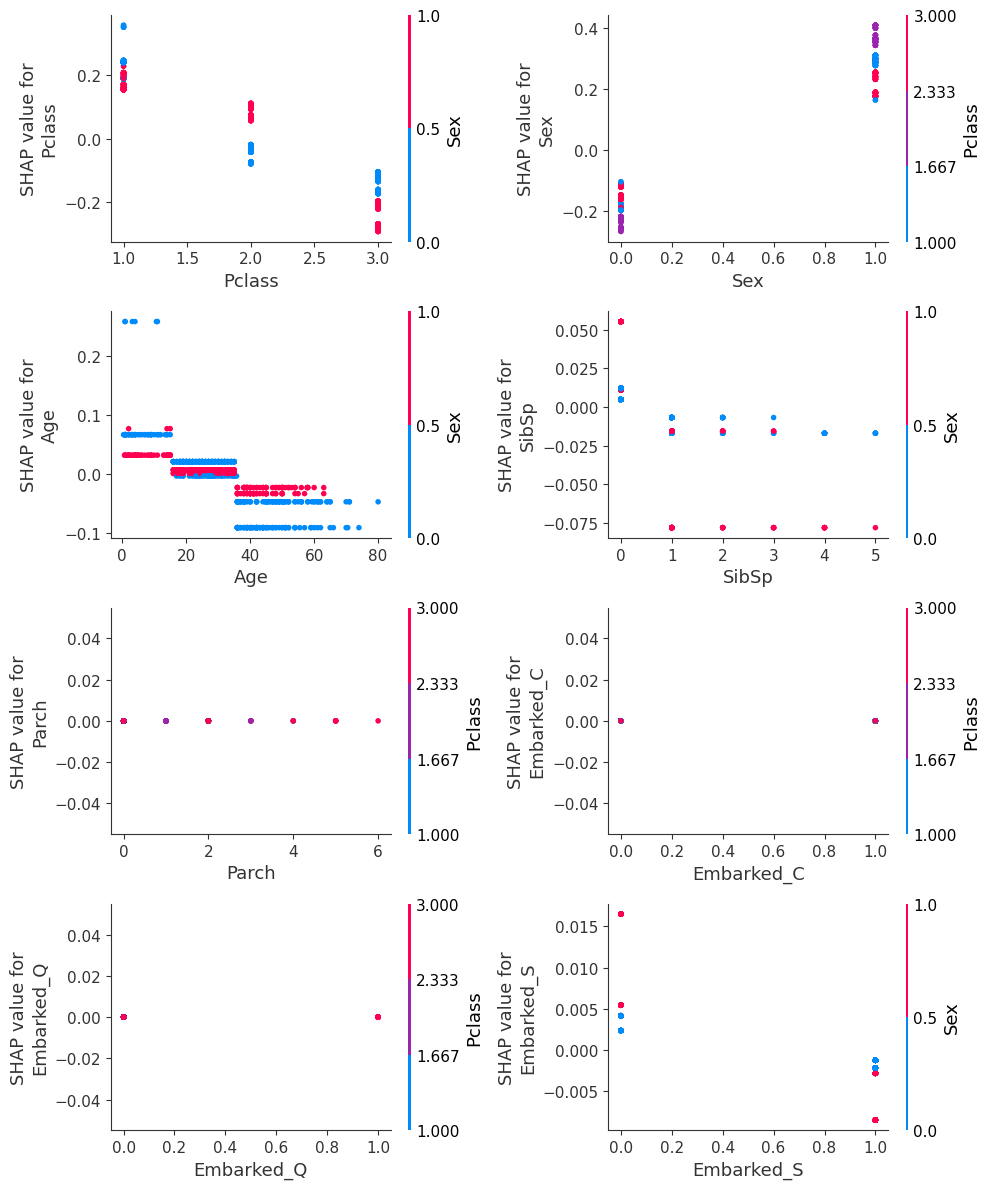

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.ravel()

for i, col in enumerate(X_train.columns):
    shap.dependence_plot(col, shap_values[1], X_train, ax=axes[i], show=False)

plt.tight_layout()

Como era de se esperar, o maior impacto na decisão provém do atributo "Sex" (sexo do passageiro), seguido pelo atributo "Pclass" (classe do ticket).



---



O próximo modelo teve dois parâmetros alterados. Foi configurado um nível máximo de decisão de 3 e a fração ponderada mínima da soma total dos pesos necessária para estar em um nó folha foi de 0,0 (default) para 0,3.

In [52]:
decision_tree_7 = DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.3, random_state=9)
decision_tree_7.fit(X_train, y_train)
y_pred = decision_tree_7.predict(X_test)

In [53]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       205

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410



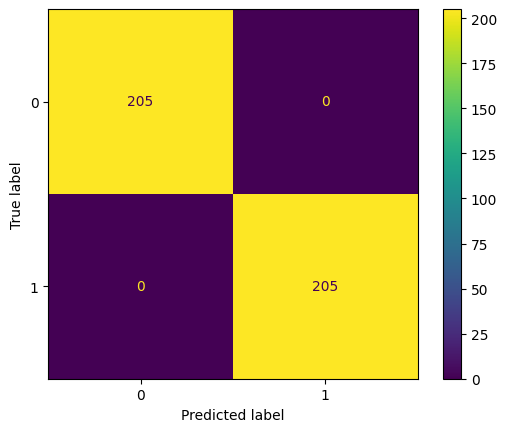

In [54]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()

<p align="justify">
O resultado obtido acima é um pouco intrigante, tendo em vista que métricas perfeitas levatam susteitas acerca do modelo. Abaixo calculamos a correlação entre os atributos, incluindo o label final.

In [55]:
train = pd.concat([X_train, y_train], axis=1)
train.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Survived
Pclass,1.000000,-0.177389,-0.371998,0.075895,0.020360,-0.246437,0.134898,0.223378,-0.377295
Sex,-0.177389,1.000000,-0.074880,0.079175,0.220524,0.105712,0.015396,-0.122196,0.486423
Age,-0.371998,-0.074880,1.000000,-0.279373,-0.197536,0.020487,-0.018793,-0.044799,-0.074905
SibSp,0.075895,0.079175,-0.279373,1.000000,0.385423,-0.032582,0.058805,0.033816,-0.065244
Parch,0.020360,0.220524,-0.197536,0.385423,1.000000,-0.027468,-0.004739,0.039053,0.058884
Embarked_C,-0.246437,0.105712,0.020487,-0.032582,-0.027468,1.000000,-0.084968,-0.809144,0.142915
Embarked_Q,0.134898,0.015396,-0.018793,0.058805,-0.004739,-0.084968,1.000000,-0.325174,-0.079195
Embarked_S,0.223378,-0.122196,-0.044799,0.033816,0.039053,-0.809144,-0.325174,1.000000,-0.178443
Survived,-0.377295,0.486423,-0.074905,-0.065244,0.058884,0.142915,-0.079195,-0.178443,1.000000


In [56]:
test = pd.concat([X_test, y_test], axis=1)
test.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Survived
Pclass,1.000000,-0.149750,-0.474824,0.012531,0.011059,-0.359512,0.204354,0.260071,-0.149750
Sex,-0.149750,1.000000,-0.039182,0.009003,0.107024,0.005869,0.041559,-0.183368,1.000000
Age,-0.474824,-0.039182,1.000000,-0.101663,-0.045618,0.203717,-0.015633,-0.185060,-0.039182
SibSp,0.012531,0.009003,-0.101663,1.000000,0.339903,-0.034151,-0.070025,0.104916,0.009003
Parch,0.011059,0.107024,-0.045618,0.339903,1.000000,0.013782,-0.107466,0.058105,0.107024
Embarked_C,-0.359512,0.005869,0.203717,-0.034151,0.013782,1.000000,-0.133179,-0.718209,0.005869
Embarked_Q,0.204354,0.041559,-0.015633,-0.070025,-0.107466,-0.133179,1.000000,-0.335303,0.041559
Embarked_S,0.260071,-0.183368,-0.185060,0.104916,0.058105,-0.718209,-0.335303,1.000000,-0.183368
Survived,-0.149750,1.000000,-0.039182,0.009003,0.107024,0.005869,0.041559,-0.183368,1.000000


<p align="justify">
Podemos observar que a correlação no dataset de testes entre "Sex" e "Survived" é de 100%, ou seja, o sexo define exatamente o destado de vida do pasageiro. Nesse cenário, o modelo deve ter alcançado métricas altas apenas considerando o sexo como critério de decisão.



---



### Procurando o Melhor Modelo

<p align="justify">
Usaremos o GridSearchCV para procurar, entre vários modelos, o modelo com melhores métricas no dataset de treinamento. Queremos saber se teremos um resultado semelhante ao modelo anterior.

In [57]:
params = {'random_state': [9],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [i for i in range(1, 11)],
          'splitter': ['best', 'random'],
          'min_samples_split': [i for i in range(2, 11)],
          'min_samples_leaf': [i for i in range(1, 6)],
          'min_weight_fraction_leaf': [(i/10) for i in range(1, 6)]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5)
grid_search.fit(X_train, y_train)
cv_best_params = grid_search.best_params_

decision_tree_gs = DecisionTreeClassifier()
decision_tree_gs.set_params(random_state = cv_best_params['random_state'],
                  criterion = cv_best_params['criterion'],
                  max_depth = cv_best_params['max_depth'],
                  splitter = cv_best_params['splitter'],
                  min_samples_split = cv_best_params['min_samples_split'],
                  min_samples_leaf = cv_best_params['min_samples_leaf'],
                  min_weight_fraction_leaf = cv_best_params['min_weight_fraction_leaf'])
decision_tree_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_weight_fraction_leaf=0.1,
                       random_state=9)

In [58]:
y_pred = decision_tree_gs.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       205

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410



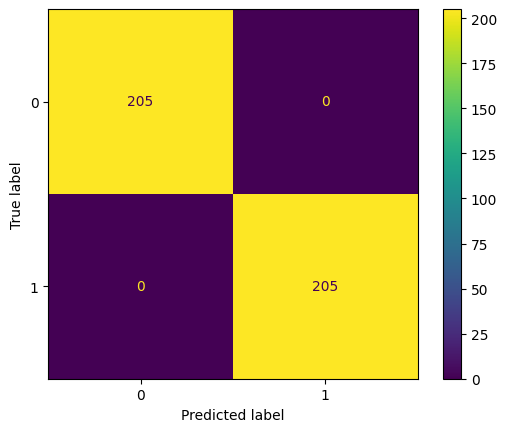

In [59]:
cmgs = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cmgs, display_labels=None)
disp.plot()

### Importancia das Variáveis

<p align="justify">
O código proposto pelo Grid Search sofre da mesma situação do modelo 7, onde ele alcança os 100% nas métricas.

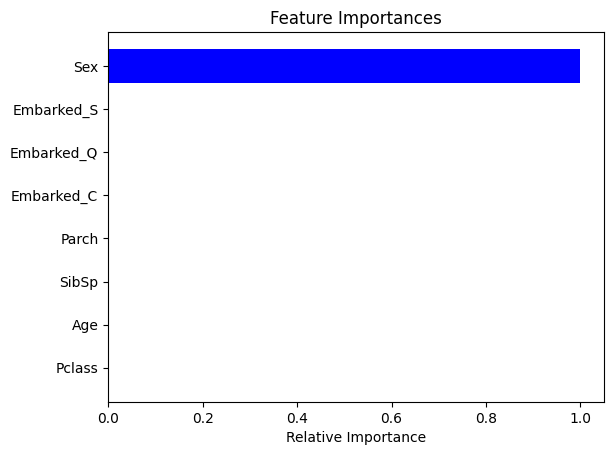

In [60]:
features = X_train.columns
importances = decision_tree_gs.feature_importances_
indices = np.argsort(importances)

feature_importances_df = pd.DataFrame({'features': features,
                                       'importances': importances})

plt.title('Feature Importances')
plt.barh(range(len(importances[indices][-15:])), importances[indices][-15:], color='b', align='center')
plt.yticks(range(len(importances[indices][-15:])), [features[i] for i in indices[-15:]])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
explainer = shap.TreeExplainer(decision_tree_gs)
shap_values = explainer.shap_values(X_train)

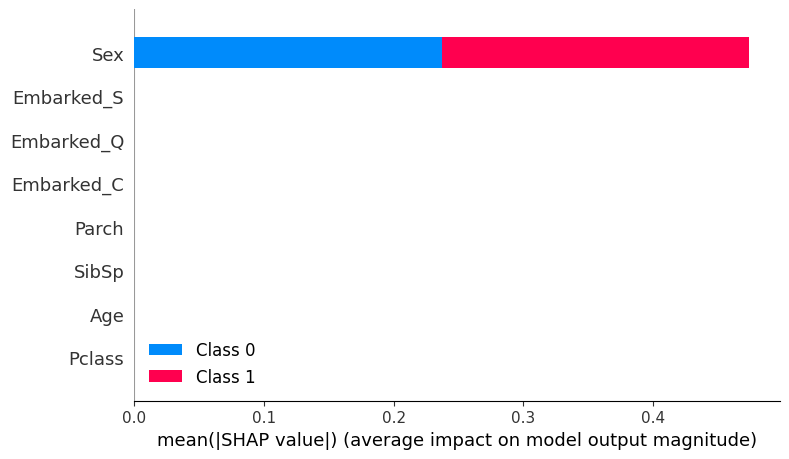

In [62]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

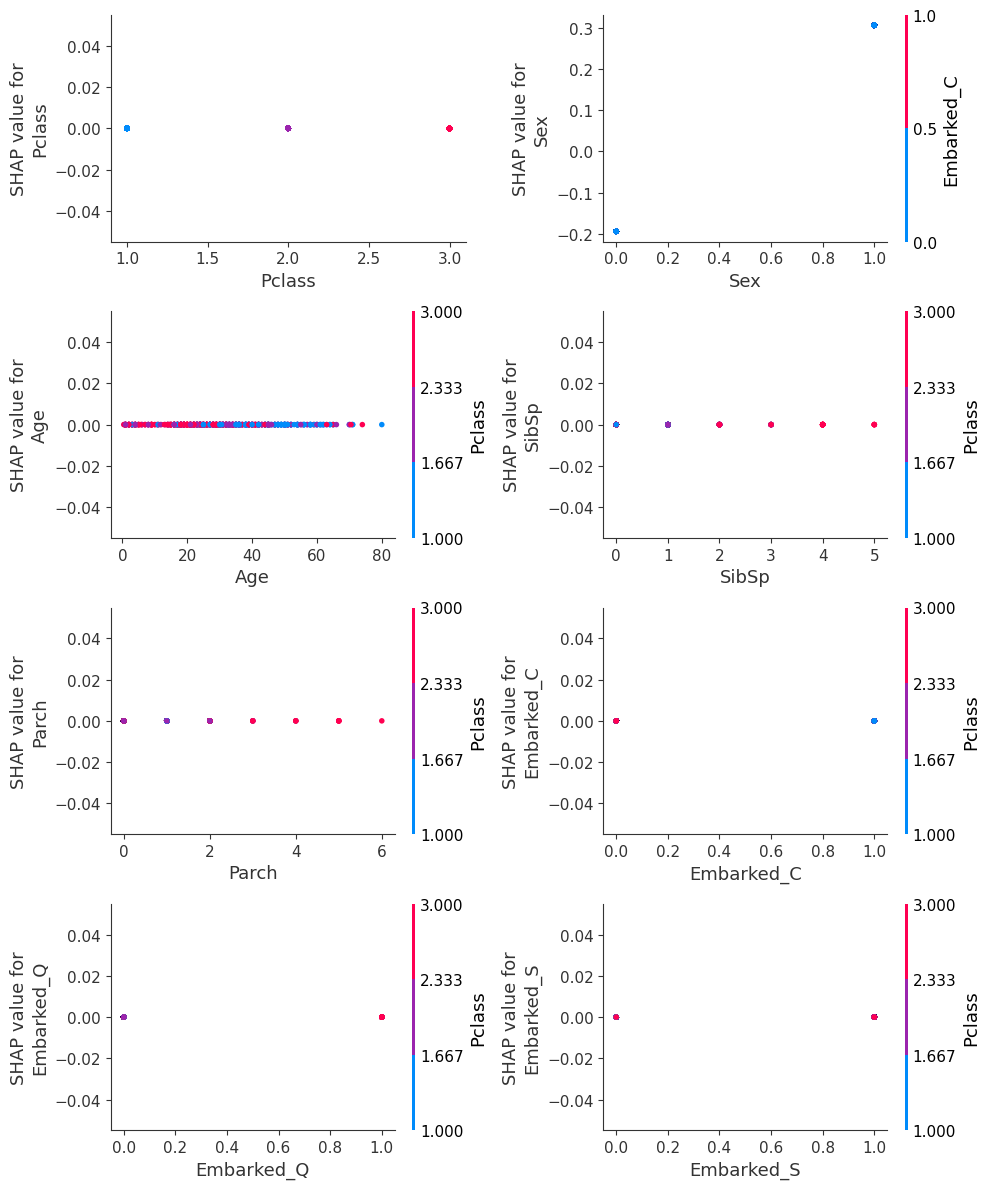

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.ravel()

for i, col in enumerate(X_train.columns):
    shap.dependence_plot(col, shap_values[1], X_train, ax=axes[i], show=False)

plt.tight_layout()

<p align="justify">
Vendo o grau de importância, percebemos que apenas o atributo "Sex" é levado em consideração, que, alinhando com a correlação no teste, proporciona um acerto de 100%.



---



## Random Forest

<p align="justify">
Será que a Random Forest conseguiria ter um desempenho melhor nesse dataset? Por ser um método mais robusto e ter uma relação direta com Decision Trees, também avaliaremos a Random Forest para comparar os resultados. Seguremos a mesma ordem de execuções anteriores, apenas modificando o classificador.

In [64]:
random_forest_0 = RandomForestClassifier()
random_forest_0.fit(X_train, y_train)

y_pred = random_forest_0.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       189
           1       0.82      0.76      0.79       221

    accuracy                           0.79       410
   macro avg       0.79      0.79      0.79       410
weighted avg       0.79      0.79      0.79       410



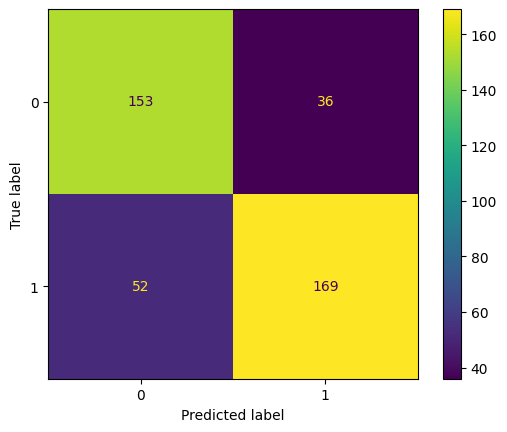

In [65]:
cmrf = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cmrf, display_labels=None)
disp.plot()

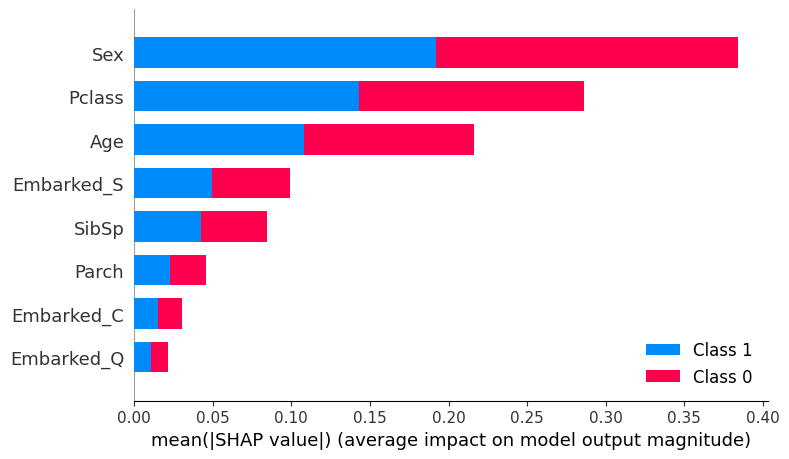

In [66]:
explainer = shap.TreeExplainer(random_forest_0)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

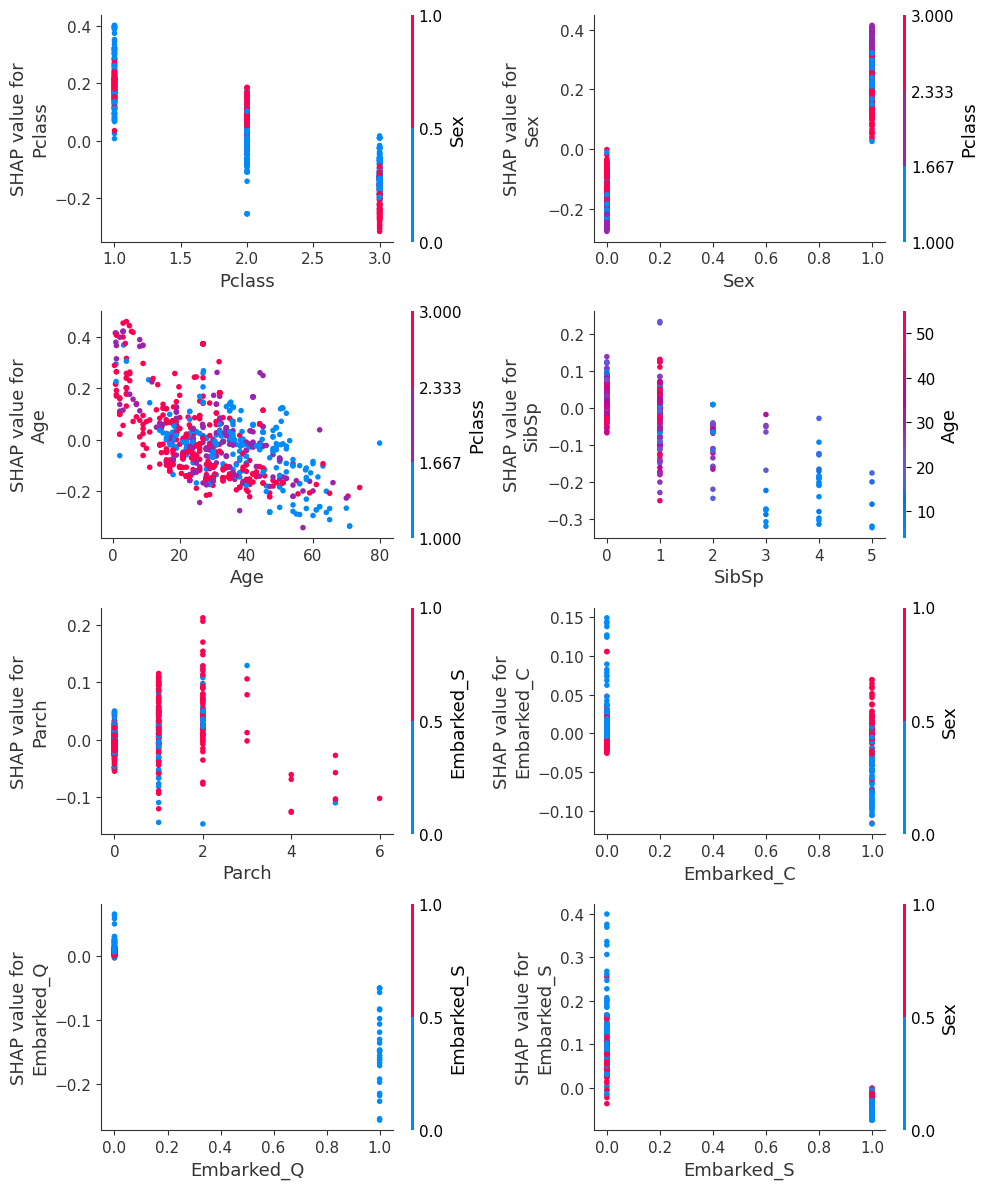

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.ravel()

for i, col in enumerate(X_train.columns):
    shap.dependence_plot(col, shap_values[1], X_train, ax=axes[i], show=False)

plt.tight_layout()

À primeira vista, vemos que a Random Forest parece dar uma importância mais "real" e próxima do que se espera dos atributos. Embora o maior impacto ainda ser o sexo do passageiro, ela não dispensa os demais fatores, podendo se sair melhor em casos reais e mais generalistas.



---



### Procurando o Melhor Modelo

Usaremos o GridSearchCV para procurar, entre vários modelos, o modelo com melhores métricas no dataset de treinamento.

In [71]:
params = {'random_state': [9],
          'n_estimators': [100, 200],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 4],
          'min_samples_leaf': [1, 3],
          'min_weight_fraction_leaf': [0.0, 0.2],
          'max_features': ['sqrt', 'log2']}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params, cv = 5)
grid_search.fit(X_train, y_train)
cv_best_params = grid_search.best_params_

random_forest_gs = RandomForestClassifier()
random_forest_gs.set_params(random_state = cv_best_params['random_state'],
                            n_estimators = cv_best_params['n_estimators'],
                            criterion = cv_best_params['criterion'],
                            max_depth = cv_best_params['max_depth'],
                            min_samples_split = cv_best_params['min_samples_split'],
                            min_samples_leaf = cv_best_params['min_samples_leaf'],
                            min_weight_fraction_leaf = cv_best_params['min_weight_fraction_leaf'],
                            max_features = cv_best_params['max_features'])
random_forest_gs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=200, random_state=9)

In [72]:
y_pred = random_forest_gs.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       181
           1       0.89      0.79      0.84       229

    accuracy                           0.83       410
   macro avg       0.83      0.83      0.83       410
weighted avg       0.84      0.83      0.83       410



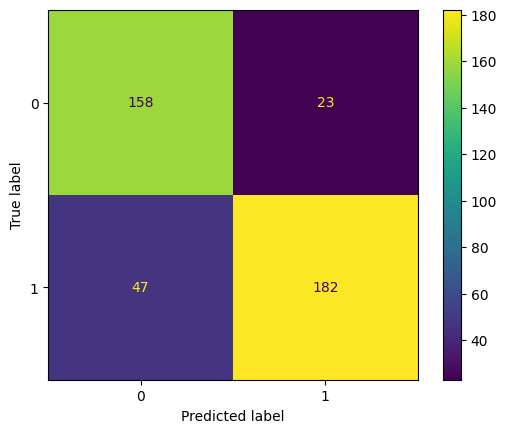

In [73]:
cmgs = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cmgs, display_labels=None)
disp.plot()

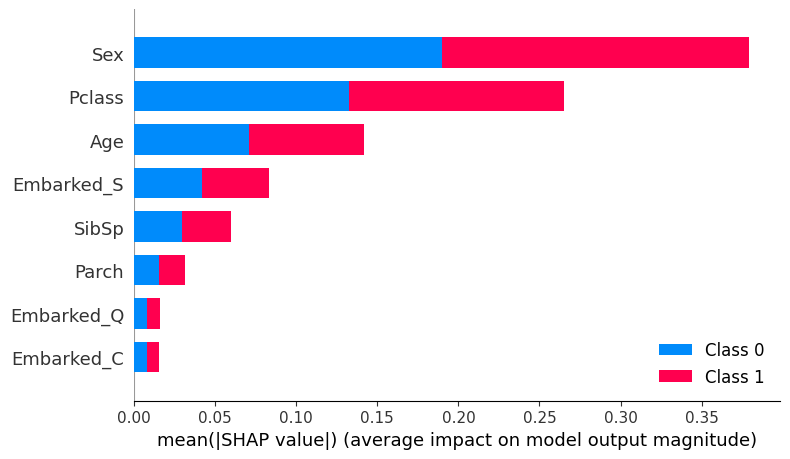

In [74]:
explainer = shap.TreeExplainer(random_forest_gs)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

Resultados semelhantes ao modelo anterior, porem aparentemente um  pouco mais especializado.



---



## Dataset Randomizado

<p align="justify">
Como o kaggle nos proporcona um dataset de testes com correlação total entre "Sex" e "Survived", resolvemos misturar test e train e fazer outra separação aleatória.

In [96]:
dataset_train = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/train.csv")
dataset_test = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/test.csv")
dataset_test_labels = pd.read_csv("/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto DecisionTree/gender_submission.csv")

dataset_test_full = pd.concat([dataset_test, dataset_test_labels], axis=1)

dataset_train = dataset_train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)
dataset_test_full = dataset_test_full.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)

dataset_train = dataset_train.dropna()
dataset_test_full = dataset_test_full.dropna()

dataset_train.shape, dataset_test_full.shape

((712, 7), (332, 7))

In [97]:
dataset = pd.concat([dataset_train, dataset_test_full], axis=0, join="outer", ignore_index=True)
dataset = pd.get_dummies(data=dataset, columns=["Embarked"])
dataset["Sex"].replace({'male': 0, 'female':1}, inplace=True)

dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,0,0,1
1,1,1,1,38.0,1,0,1,0,0
2,1,3,1,26.0,0,0,0,0,1
3,1,1,1,35.0,1,0,0,0,1
4,0,3,0,35.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1039,1,3,1,3.0,1,1,0,0,1
1040,1,1,1,37.0,1,0,0,1,0
1041,1,3,1,28.0,0,0,0,0,1
1042,1,1,1,39.0,0,0,1,0,0


In [98]:
dataset_X = dataset.drop('Survived', axis=1)
dataset_y = dataset['Survived']

X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.25, random_state=9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((783, 8), (261, 8), (783,), (261,))

In [99]:
y_pred = decision_tree_7.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       175
           1       0.78      0.83      0.80        86

    accuracy                           0.87       261
   macro avg       0.85      0.86      0.85       261
weighted avg       0.87      0.87      0.87       261



In [100]:
y_pred = decision_tree_gs.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       175
           1       0.78      0.83      0.80        86

    accuracy                           0.87       261
   macro avg       0.85      0.86      0.85       261
weighted avg       0.87      0.87      0.87       261



<p align="justify">
Com o dataset randomizado, não ocorre mais a coincidência de se ter correlação de 100% entre o sexo do passageiro e a sua sobrevivência, logo os modelos não acertam mais apenas por esse fator.

In [101]:
params = {'random_state': [9],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [i for i in range(1, 6)],
          'splitter': ['best', 'random'],
          'min_samples_split': [i for i in range(2, 6)],
          'min_samples_leaf': [i for i in range(1, 6)],
          'min_weight_fraction_leaf': [(i/10) for i in range(1, 4)]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5)
grid_search.fit(X_train, y_train)
cv_best_params = grid_search.best_params_

decision_tree_gsrd = DecisionTreeClassifier()
decision_tree_gsrd.set_params(random_state = cv_best_params['random_state'],
                  criterion = cv_best_params['criterion'],
                  max_depth = cv_best_params['max_depth'],
                  splitter = cv_best_params['splitter'],
                  min_samples_split = cv_best_params['min_samples_split'],
                  min_samples_leaf = cv_best_params['min_samples_leaf'],
                  min_weight_fraction_leaf = cv_best_params['min_weight_fraction_leaf'])
decision_tree_gsrd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_weight_fraction_leaf=0.1,
                       random_state=9)

In [102]:
y_pred = decision_tree_gsrd.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       175
           1       0.78      0.83      0.80        86

    accuracy                           0.87       261
   macro avg       0.85      0.86      0.85       261
weighted avg       0.87      0.87      0.87       261



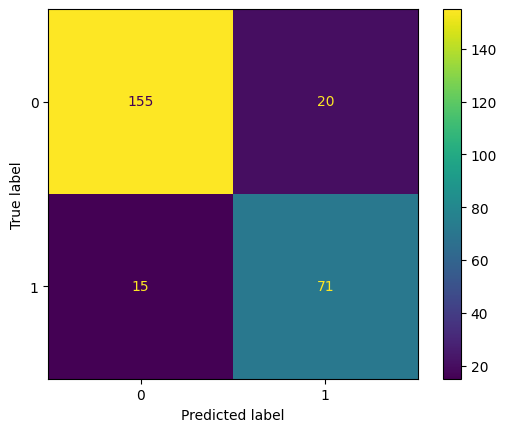

In [103]:
cm1 = confusion_matrix(y_pred, y_test, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()

## Conclusões

<p align="justify">
É possível perceber no dataset o desequilíbrio entre os atributos, tanto econômica quanto de gênero, porém devido ao dataset utilizado, a classificação de sobrevivência teve uma correlação de 1 com o gênero no dataset de teste, visto que nele todos os homens morriam e todas as mulheres sobreviviam, levando a árvore de decisão a acertar boa parte dos casos. Talvez seja possível resolver esse problema misturando um pouco mais os dados.

No modelo 6 é possível perceber que ele leva mais em conta os outros atributos do dataset além do gênero, diferente do modelo 7 e grid search, como o pclass e a idade. É esperado que mais pessoas da terceira classe, por exemplo, morram visto que havia mais pessoas nessa classe, além das classes mais altas terem prioridade na hora da evacuação. O mesmo parece ocorrer na Random Forest, que parece também aplicar uma solução mais generalista e, consequentemente, melhor para casos reais.

Finalmente, ao testar com o dataset randomizado (diferente da divisão que foi proposta), o problema não se resolveu da forma esperada. Tal comportamento pode evidenciar que os modelos tendem a ver o julgamento pelo sexo do passageiro como algo prioritário.